In [2]:
import sys
sys.path.append("../lib/")
sys.path.append("..")

import torch
from bert import *
from utils import *
import csv
from pandas import DataFrame
import pandas as pd

bert = BERTBase()

INFO:pytorch_pretrained_bert.modeling:loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at /Users/gabriellachronis/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
INFO:pytorch_pretrained_bert.modeling:extracting archive file /Users/gabriellachronis/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /var/folders/9m/vzvx58rs51v_x5nm620fz4xr0000gn/T/tmpf86jzfbb
INFO:pytorch_pretrained_bert.modeling:Model config {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "type_vocab_size": 2,
  "vocab_size": 3

In [3]:
# load both single and multi-prototype models

mpro_model = torch.load('../trained_models/model.plsr.buchanan.allbuthomonyms.5k.300components.500max_iters')


#spro_model = torch.load('../trained_models/model.30eps.5k.saved6')

In [5]:
m = torch.load('../trained_models/model.plsr.mc_rae_real.5k.100components.500max_iters')
m.feature_norms.get_features('banana')

/usr/local/lib/python3.9/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator PLSRegression from version 0.23.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


['is_yellow',
 'a_fruit',
 'is_edible',
 'is_soft',
 'grows_on_trees',
 'eaten_by_peeling',
 'eaten_by_monkeys',
 'is_long',
 'tastes_good',
 'grows_in_tropical_climates',
 'has_peel',
 'is_green',
 'is_healthy',
 'has_a_skin',
 'is_round']

In [28]:
mpro_model.feature_norms.top_n('banana', 5)

['enjoy', 'flesh', 'ground', 'jungle', 'slip']

In [20]:
"""
Load in a bunch of duck sentences, with the semcor sense id labeled
"""


df = pd.read_csv('../data/duck.txt', sep='\t', names = ['sentence', 'sense_id'])

In [21]:
pd.set_option('display.max_rows', 1000)

feats = []
preds = []

for ind in df.index:
    logits = mpro_model.predict_in_context('duck', df['sentence'][ind], bert)
    preds.append(logits)
    
    predicted_features = mpro_model.predict_top_n_features_in_context('duck', df['sentence'][ind], 7, bert=bert, vec=logits)
    feats.append(predicted_features)


    
df['features'] = feats
df['preds'] = preds
df

,sentence,sense_id,features,preds
0,"Game birds consist of teal and wild duck, snip...",0.0,"[water, wing, feather, fly, bird, eat, animal]","[0.037588113616552114, -0.037183155483728386, ..."
1,He slid up right behind her before she could d...,1.0,"[ground, body, eat, fall, move, woman, water]","[-0.009160048166363267, -0.07350773650982706, ..."
2,The cables are wrapped in cotton duck soaked i...,2.0,"[bird, water, grow, fly, animal, eat, small]","[-0.005877191525979357, -0.046796109995098006,..."
3,"Geese, duck and teal are abundant.",0.0,"[person, fly, eat, water, bird, feather, animal]","[0.04332843818320772, -0.04859781627419622, 0...."
4,"The duck, on the other hand, when newly hatche...",0.0,"[feather, bird, animal, water, leg, fly, eat]","[0.04594346179120309, 0.015191324865735508, 0...."
5,"I have laughed at the poor duck, with the red ...",0.0,"[swim, bird, eat, leg, fly, animal, water]","[0.024299869802225434, 0.016097452572811217, 0..."
6,"A cannon ball, flying close to him, caused him...",1.0,"[animal, move, eat, bird, fly, human, act]","[0.01808418666580015, -0.03868642841757389, 0...."
7,I just need a place to duck out of the rain fo...,1.0,"[animal, object, human, away, act, hand, move]","[-0.0077552190259949074, 0.03438245875751875, ..."
8,Hen and duck house.,0.0,"[leg, small, animal, water, eat, fly, bird]","[-0.012156145621845572, 0.039711836557406316, ..."
9,The ceiling was so low I had to duck my head.,1.0,"[swim, move, water, body, eat, act, human]","[0.002109371925761771, 0.007091362985026932, 0..."


In [22]:
"""
I want to figure out how to get the values for just the features that I care about like 'swim'
"""

example = df.iloc[1]['preds']
example

array([-0.00916005, -0.07350774,  0.10979382, ..., -0.00486606,
        0.00085455, -0.00032424])

In [23]:
# get the index of the 'swim' feature

swim_idx = mpro_model.feature_norms.feature_map.index_of('swim')
swim_idx

479

In [24]:
# get the value of the swim feature for this example
example[swim_idx]

0.17180291240332193

In [25]:
# get fly index
fly_idx = mpro_model.feature_norms.feature_map.index_of('fly')
eat_idx = mpro_model.feature_norms.feature_map.index_of('eat')
fly_idx

385

In [26]:
#Collect the 'swim' value for all examples
swim_vals = []
fly_vals = []
eat_vals = []

for index, row in df.iterrows():
    swim_val = row['preds'][swim_idx]
    fly_val = row['preds'][fly_idx]
    eat_val = row['preds'][eat_idx]
    
    swim_vals.append(swim_val)
    fly_vals.append(fly_val)
    eat_vals.append(eat_val)
    
df['swim_vals'] = swim_vals
df['fly_vals'] = fly_vals
df['eat_vals'] = eat_vals

df.head(5)

,sentence,sense_id,features,preds,swim_vals,fly_vals,eat_vals
0,"Game birds consist of teal and wild duck, snip...",0.0,"[water, wing, feather, fly, bird, eat, animal]","[0.037588113616552114, -0.037183155483728386, ...",0.448695,0.725891,0.868953
1,He slid up right behind her before she could d...,1.0,"[ground, body, eat, fall, move, woman, water]","[-0.009160048166363267, -0.07350773650982706, ...",0.171803,0.146858,0.185213
2,The cables are wrapped in cotton duck soaked i...,2.0,"[bird, water, grow, fly, animal, eat, small]","[-0.005877191525979357, -0.046796109995098006,...",0.237549,0.437915,0.722728
3,"Geese, duck and teal are abundant.",0.0,"[person, fly, eat, water, bird, feather, animal]","[0.04332843818320772, -0.04859781627419622, 0....",0.424791,0.592997,0.952071
4,"The duck, on the other hand, when newly hatche...",0.0,"[feather, bird, animal, water, leg, fly, eat]","[0.04594346179120309, 0.015191324865735508, 0....",0.366736,0.577072,0.913730


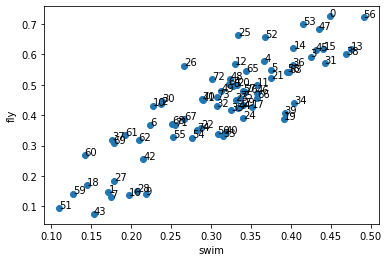

In [27]:
"""
Now I want to chart these sentences by their swim and fly values, and see the sentence.
"""

fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()

ax.scatter(swim_vals, fly_vals)
ax.set_xlabel("swim")
ax.set_ylabel("fly")
#ax.set_zlabel("eat")

for i, txt in enumerate(df.index.values.tolist()):
    ax.annotate(txt, (swim_vals[i], fly_vals[i]) )
    #ax.text(swim_vals[i], fly_vals[i], eat_vals[i], txt)


In [ ]:
# want to see all the sentences for cross-reference

pd.set_option('display.max_colwidth', -1) 
df

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

# Let's try some other words

In [8]:
"""
let's define some general function that will allow us to input a word 
and a number of features and chart the relative values of those
features
"""


def read_semcor_occurrences_of(word):
    names = ["lemma", "wn_sense", "word_form", "context", ]
    tokens = pd.read_csv('../data/semcor_eval_data_11_27_2021.csv', names = names)
    tokens = tokens[tokens['lemma'] == word]
    tokens = tokens.reset_index(drop=True)
    return tokens

def add_predictions(word, data, model,  bert):
    """
    requires a dataframe with columns
    word_form
    context
    """
    feats = []
    preds = []
    
    for ind, row in data.iterrows():
        
        logits = model.predict_in_context(row.word_form, row.context, bert)
        preds.append(logits)

        predicted_features = model.predict_top_n_features_in_context(row.word_form, row.context, 7, bert=bert, vec=logits)
        feats.append(predicted_features)

    data['features'] = feats
    data['preds'] = preds
    return data

def isolate_feature_values(model, x_feature, y_feature, tokens):
    x_idx = model.feature_norms.feature_map.index_of(x_feature)
    y_idx = model.feature_norms.feature_map.index_of(y_feature)

    x_vals = []
    y_vals = []

    for index, row in tokens.iterrows():
        x_val = row['preds'][x_idx]
        y_val = row['preds'][y_idx]

        x_vals.append(x_val)
        y_vals.append(y_val)

    return((x_vals, y_vals))


def chart_vals(x_feature, y_feature, x_feature_values, y_feature_values, tokens):
    fig = plt.figure()
    #ax = fig.add_subplot(projection='3d')
    ax = fig.add_subplot()

    ax.scatter(x_feature_values, y_feature_values)
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    #ax.set_zlabel("eat")

    for i, txt in enumerate(tokens.index.values.tolist()):
        ax.annotate(txt, (x_feature_values[i], y_feature_values[i]) )    
    
def compare_features(word, x_feature, y_feature, model, word_data=None):
    if word_data is not None:
        tokens = word_data
    else:
        tokens = read_semcor_occurrences_of(word)
    
    tokens = add_predictions(word, tokens, model, bert)
    x_feature_values, y_feature_values = isolate_feature_values(model, x_feature, y_feature, tokens)
    chart_vals(x_feature, y_feature, x_feature_values, y_feature_values, tokens)
    print(tokens.context)




In [3]:
"""
look at what features we have available to us
"""

model = torch.load('../trained_models/model.plsr.mc_rae_real.5k.100components.500max_iters')
model.feature_norms.feature_map

['a_musical_instrument', 'has_keys', 'requires_air', 'associated_with_polkas', 'has_buttons', 'used_by_moving_bellows', 'inbeh_-_produces_music', 'is_loud', 'worn_on_chest', 'beh_-_flies', 'has_wings', 'used_for_passengers', 'is_fast', 'requires_pilots', 'used_for_transportation', 'found_in_airports', 'is_large', 'made_of_metal', 'inbeh_-_crashes', 'used_for_travel', 'has_a_propeller', 'has_engines', 'has_teeth', 'is_green', 'an_animal', 'is_long', 'a_reptile', 'lives_in_swamps', 'has_scales', 'lives_in_water', 'has_a_tail', 'is_scary', 'beh_-_swims', 'has_a_mouth', 'lives_in_Florida', 'beh_-_eats_people', 'has_jaws', 'is_dangerous', 'has_a_siren', 'has_flashing_lights', 'is_white', 'used_by_hospitals', 'used_for_emergencies', 'a_vehicle', 'requires_caregivers', 'has_4_wheels', 'is_red', 'used_by_sick_people', 'used_for_injuries', 'a_van', 'is_orange', 'used_by_paramedics', 'used_for_rescuing', 'is_heavy', 'found_on_boats', 'used_for_holding_boats_still', 'inbeh_-_sinks', 'used_for_sta

<ipython-input-58-d3f35ff8c86e>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


0     The colored boy had it , and Trig lunged at him with a knife and said , ' Give that to me , you black bastard .                                                                        
1     `` The Negro got a bad slice on his chest from the knife wound '' .                                                                                                                    
2     McKinley was overheard to say that he would like to get the knife into Spencer 's possession and that '' -                                                                             
3     An African knife and battle-ax are at this moment being sharpened by McKinley and Green .                                                                                              
4     A New York kid , a refugee from one of the Harlem gangs , made fun of Trig 's accent , and drew a knife .                                                                              
5     Then he looked at his finger , at the wrinkl

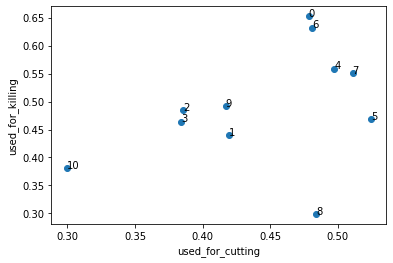

In [58]:
pd.set_option('display.max_colwidth', -1) 


word = 'knife'
x_feature = 'used_for_cutting'
y_feature = 'used_for_killing'

# word = 'letter'
# x_feature = 'has_information'
# y_feature = 'made_of_paper'

word = 'knife'
x_feature = 'used_for_cutting'
y_feature = 'used_for_killing'

compare_features(word, x_feature, y_feature)

In [5]:
model.feature_norms.get_features('banana')

['is_yellow',
 'a_fruit',
 'is_edible',
 'is_soft',
 'grows_on_trees',
 'eaten_by_peeling',
 'eaten_by_monkeys',
 'is_long',
 'tastes_good',
 'grows_in_tropical_climates',
 'has_peel',
 'is_green',
 'is_healthy',
 'has_a_skin',
 'is_round']

32
9
[0.6682756591920485, 0.4835858070975724, 0.5711748220693171, 0.4921302295467104]
[0.7922894857909516, 0.7832671647038655, 0.7310012548609824, 0.7633776181511808]
0    He stroked the hens and they responded with delighted clucks , he gobbled with the turkeys and they at once were all attention , he quacked with the ducks , and cackled with a pair of exceedingly flattered geese .                                                                                         
1    Out of this background of hunting and fishing , it was only natural that Roy first painted subjects he knew best : hunters in the field , fishermen in the stream , ducks and geese on the wing - almost always against a vast backdrop of weather landscape .                                                
2    I would not want to be one of those writers who begin each morning by exclaiming , `` O Gogol , O Chekhov , O Thackeray and Dickens , what would you have made of a bomb shelter ornamented with four plaster-of-Par

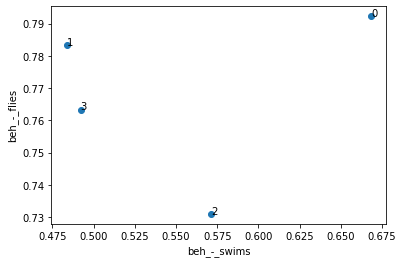

In [55]:
compare_features('duck', 'beh_-_swims', 'beh_-_flies')

In [62]:
# get some likely features fro communication
model.predict_top_n_features_in_context('communications',"But fathers often addressed communications to their small children ; and these , full of homely advice , are among the most human and revealing of Civil War letters .", 20, bert)


['used_for_listening',
 'used_for_playing_FM',
 'used_for_playing_different_stations',
 'inbeh_-_produces_static',
 'used_for_playing_AM',
 'is_portable',
 'has_a_seal',
 'has_a_cord',
 'is_yellow',
 'is_brown',
 'made_of_paper',
 'has_fur',
 'made_of_plastic',
 'found_in_houses',
 'is_fast',
 'made_of_metal',
 'is_long',
 'is_small',
 'has_numbers',
 'used_for_communication']

0     Naturally this includes all communication forms , e. g. languages , or any social , political , economic or religious structures employed for such control .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1     The connective system , or network , is tailored to meet the requirements of the objective , and it is therefore not surprising that a military body acting as a single coordinated unit has a different communication network th

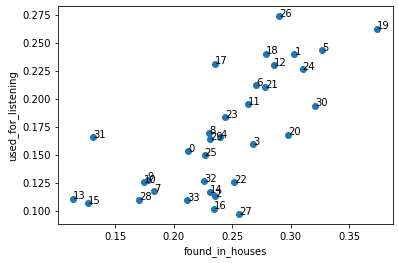

In [63]:
compare_features('communication', 'found_in_houses', 'used_for_listening')

In [71]:
sentence = "A woman who dominates other family affairs will dominate the sexual relationship as well."
model.predict_top_n_features_in_context('woman', sentence, 20, bert)


['is_loud',
 'is_red',
 'furniture',
 'is_dangerous',
 'is_heavy',
 'used_for_killing',
 'different_sizes',
 'a_weapon',
 'is_white',
 'made_of_material',
 'is_soft',
 'is_large',
 'has_fur',
 'worn_by_women',
 'is_small',
 'is_black',
 'a_mammal',
 'beh_-_eats',
 'has_4_legs',
 'has_legs']

In [75]:
"""
okay there arent great features for human things, how about some more boring concrete objects
"""
model.predict_top_n_features('river', 20)

['used_for_passengers',
 'has_scales',
 'found_in_bathrooms',
 'inbeh_-_floats',
 'has_fins',
 'used_by_people',
 'made_of_metal',
 'a_fish',
 'used_for_transportation',
 'is_large',
 'has_legs',
 'an_animal',
 'is_long',
 'lives_in_water',
 'has_a_tail',
 'beh_-_swims',
 'made_of_wood',
 'is_brown',
 'has_gills',
 'is_green']

0     After three weeks ' swift sailing , however , the ship entered an area of shallow marshes and river deltas .                                                                                                                                                                                                            
1     The enemy had filtered across the river during the night and a full force of 1000 men , armed with Russian machine guns , attacked the position held by Chandler 's men .                                                                                                                                               
2     There at the river 's edge waited one Henry Greene , whom Hudson listed as a `` clerk '' .                                                                                                                                                                                                                              
3     Mynheer , Sir Francis , the valley so

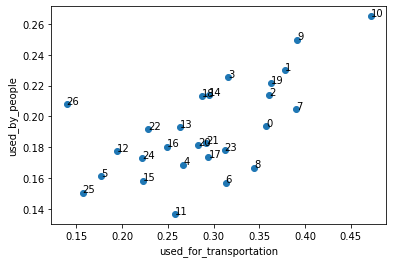

In [77]:
compare_features('river', 'used_for_transportation', 'used_by_people')

In [81]:
model.predict_top_n_features('muscle', 20)

['an_animal',
 'made_of_material',
 'is_silver',
 'used_for_protection',
 'is_strong',
 'a_vegetable',
 'has_4_legs',
 'a_mammal',
 'is_black',
 'made_of_wood',
 'is_small',
 'different_colours',
 'has_legs',
 'an_insect',
 'is_long',
 'is_heavy',
 'is_edible',
 'is_hard',
 'made_of_metal',
 'is_large']

0     A high protein diet , calcium lactate supplements , and norethandrolone failed to change the skeletal complaint or the severe muscle weakness .                                                                                                                                                                                                                                                                                                                                                                                     
1     Chlorothiazide was omitted for a 2 - week period , but there was no change in the muscle weakness .                                                                                                                                                                                                                                                                                                                                                                                    

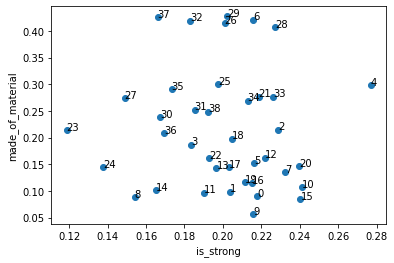

In [83]:
compare_features('muscle', 'is_strong', 'made_of_material')

In [85]:
model.predict_top_n_features('house', 20)

['found_in_forests',
 'different_colours',
 'used_for_shelter',
 'used_for_vacations',
 'has_a_kitchen',
 'found_in_the_country',
 'has_walls',
 'has_a_handle',
 'found_in_kitchens',
 'found_in_houses',
 'used_as_a_house',
 'used_for_storage',
 'made_of_brick',
 'is_large',
 'a_house',
 'made_of_wood',
 'used_for_living_in',
 'is_small',
 'has_a_roof',
 'has_windows']

0     He does n't think that potting them from a deck chair on the south side of the house with a quart glass of beer for sustenance is entirely sporting .                                                                                                                                                                                                                                                                                                                                                                                                
1     The old woman , stubbornly reigning in the house above the crashing waters took on an ominous reality .                                                                                                                                                                                                                                                                                                                                                               

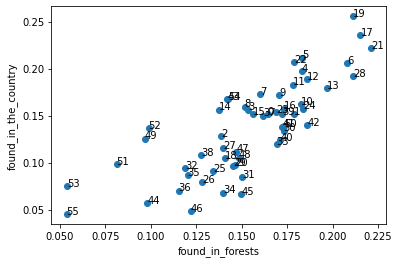

In [86]:
compare_features('house', 'found_in_forests', 'found_in_the_country')

0     He does n't think that potting them from a deck chair on the south side of the house with a quart glass of beer for sustenance is entirely sporting .                                                                                                                                                                                                                                                                                                                                                                                                
1     The old woman , stubbornly reigning in the house above the crashing waters took on an ominous reality .                                                                                                                                                                                                                                                                                                                                                               

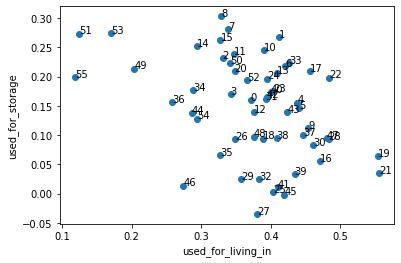

In [87]:
compare_features('house', 'used_for_living_in', 'used_for_storage')

In [97]:
"""
now lets look at some buchanan features
"""

model = torch.load('../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters')


In [90]:
model.predict_top_n_features('house', 20)

['hand',
 'roof',
 'home',
 'metal',
 'living',
 'window',
 'live',
 'in',
 'door',
 'place',
 'object',
 'large',
 'wood',
 'small',
 'family',
 'room',
 'house',
 'build',
 'human',
 'person']

0     He does n't think that potting them from a deck chair on the south side of the house with a quart glass of beer for sustenance is entirely sporting .                                                                                                                                                                                                                                                                                                                                                                                                
1     The old woman , stubbornly reigning in the house above the crashing waters took on an ominous reality .                                                                                                                                                                                                                                                                                                                                                               

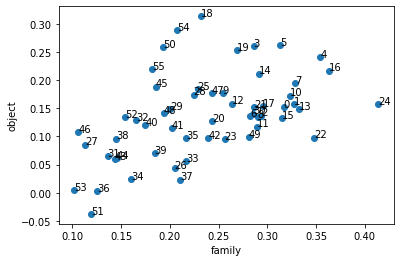

In [92]:
compare_features('house', 'family', 'object', model)

In [93]:
model.predict_top_n_features('month', 20)

['part',
 'thirty',
 'long',
 'hour',
 'twenty-four',
 'season',
 'measure',
 'twelve',
 'school',
 'work',
 'four',
 'calendar',
 'time',
 'day',
 'week',
 'one',
 'period',
 'sun',
 'year',
 'month']

0     Next to Leo Durocher , Dark taught Mays the most when he was a grass green rookie rushed up to the Polo Grounds 10 years ago this month , to help the Giants win a dramatic pennant .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1     An amazing article in the Manchester Guardian of last November , entitled `` Fate of Redundant Churches '' , states than an Archbishops ' Commission `` reported last month that in the Church of England alone there are 790 churches which are redundant now , or

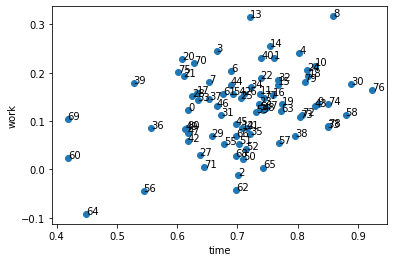

In [94]:
compare_features('month', 'time', 'work', model)

In [17]:
model = torch.load('../trained_models/model.plsr.binder.5k.100components.500max_iters')
model.feature_norms.feature_map

['Vision', 'Bright', 'Dark', 'Color', 'Pattern', 'Large', 'Small', 'Motion', 'Biomotion', 'Fast', 'Slow', 'Shape', 'Face', 'Body', 'Touch', 'Temperature', 'Texture', 'Weight', 'Pain', 'Audition', 'Loud', 'Low', 'High', 'Sound', 'Music', 'Speech', 'Taste', 'Smell', 'Head', 'UpperLimb', 'LowerLimb', 'Landmark', 'Path', 'Scene', 'Near', 'Toward', 'Away', 'Number', 'Time', 'Duration', 'Long', 'Short', 'Consequential', 'Social', 'Human', 'Communication', 'Self', 'Cognition', 'Benefit', 'Harm', 'Pleasant', 'Unpleasant', 'Happy', 'Sad', 'Angry', 'Disgusted', 'Fearful', 'Surprised', 'Drive', 'Needs', 'Attention', 'Arousal']

In [29]:
model.feature_norms.top_n('banana', 5)

['Motion', 'Biomotion', 'Slow', 'Face', 'Audition']

In [102]:
model.predict_top_n_features('month', 20)

['Speech',
 'Happy',
 'Large',
 'Taste',
 'Disgusted',
 'Self',
 'Sound',
 'Time',
 'Long',
 'Dark',
 'Audition',
 'Pain',
 'Smell',
 'Near',
 'Slow',
 'Needs',
 'Path',
 'Fast',
 'High',
 'Angry']

0     Next to Leo Durocher , Dark taught Mays the most when he was a grass green rookie rushed up to the Polo Grounds 10 years ago this month , to help the Giants win a dramatic pennant .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1     An amazing article in the Manchester Guardian of last November , entitled `` Fate of Redundant Churches '' , states than an Archbishops ' Commission `` reported last month that in the Church of England alone there are 790 churches which are redundant now , or

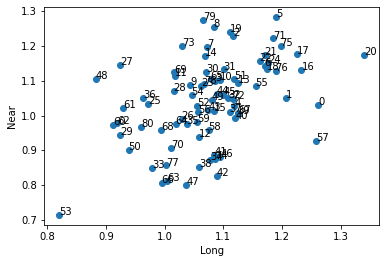

In [103]:
compare_features('month', 'Long', 'Near', model)

In [107]:
model.predict_top_n_features('justice', 20)

['Short',
 'Human',
 'LowerLimb',
 'L10 FREQ',
 'UpperLimb',
 'Unpleasant',
 'Happy',
 'Path',
 'Self',
 'Fast',
 'High',
 'Long',
 'Near',
 'Biomotion',
 'Duration',
 'Time',
 'Away',
 'Communication',
 'Bright',
 'Slow']

0     The Giants who had been anemic with the bat in their windy Candlestick Park suddenly found the formula in Milwaukee 's park .                                                                                                                                                                                 
1     Nine of the league 's teams play in baseball parks and therefore face an early season conflict in dates .                                                                                                                                                                                                     
2     A body of water is usually the center of interest at parks which attract the greatest picnic and camping use .                                                                                                                                                                                                
3     Through the efforts of SAAMI 's shooting development program these 

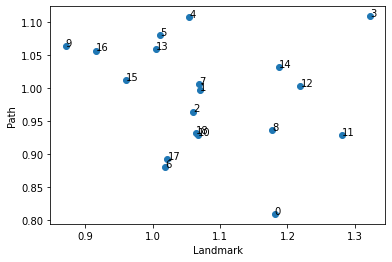

In [112]:
compare_features('park', 'Landmark', 'Path', model)

0     It is on them alone that the future of their race depends , for all their relatives ( mothers , husbands , brothers , and unmated sisters ) have perished with the arrival of the cold weather .                                                                                                                                                                                                                        
1     If a child had a single drop of Negro blood , he would revert to the ancestral line which , except as slaves under a superior race , had not made one step of progress in 3000 years .                                                                                                                                                                                                                                  
2     La^utner , for his part , `` belonged to the present-day race of small artists , who do not demand the utmost of themselves '' , and the bitter description of the t

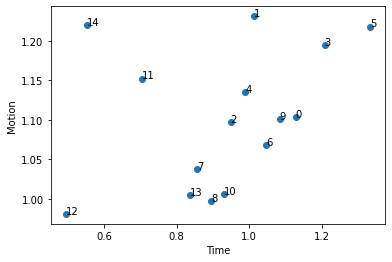

In [119]:
compare_features('race', 'Time', 'Motion', model)

In [128]:
model = torch.load('../trained_models/model.plsr.mc_rae_real.5k.100components.500max_iters')

model.feature_norms.feature_map


['a_musical_instrument', 'has_keys', 'requires_air', 'associated_with_polkas', 'has_buttons', 'used_by_moving_bellows', 'inbeh_-_produces_music', 'is_loud', 'worn_on_chest', 'beh_-_flies', 'has_wings', 'used_for_passengers', 'is_fast', 'requires_pilots', 'used_for_transportation', 'found_in_airports', 'is_large', 'made_of_metal', 'inbeh_-_crashes', 'used_for_travel', 'has_a_propeller', 'has_engines', 'has_teeth', 'is_green', 'an_animal', 'is_long', 'a_reptile', 'lives_in_swamps', 'has_scales', 'lives_in_water', 'has_a_tail', 'is_scary', 'beh_-_swims', 'has_a_mouth', 'lives_in_Florida', 'beh_-_eats_people', 'has_jaws', 'is_dangerous', 'has_a_siren', 'has_flashing_lights', 'is_white', 'used_by_hospitals', 'used_for_emergencies', 'a_vehicle', 'requires_caregivers', 'has_4_wheels', 'is_red', 'used_by_sick_people', 'used_for_injuries', 'a_van', 'is_orange', 'used_by_paramedics', 'used_for_rescuing', 'is_heavy', 'found_on_boats', 'used_for_holding_boats_still', 'inbeh_-_sinks', 'used_for_sta

In [121]:

sentences = ["The chef cut the onion",
            "The onion cut the chef"]

for sent in sentences:
    feats = model.predict_top_n_features_in_context('onion', sent, 15, bert)
    print(feats)

['is_red', 'made_of_metal', 'eaten_by_cooking', 'is_yellow', 'is_white', 'tastes_good', 'is_nutritious', 'grows_in_gardens', 'eaten_in_soups', 'is_round', 'is_small', 'eaten_in_salads', 'a_vegetable', 'is_green', 'is_edible']
['a_fruit', 'has_skin', 'made_of_metal', 'eaten_in_salads', 'is_white', 'is_yellow', 'tastes_good', 'eaten_in_soups', 'eaten_by_cooking', 'is_small', 'is_edible', 'a_vegetable', 'is_round', 'is_nutritious', 'is_green']


In [134]:
"""
the datframes usually have the form 
["lemma", "wn_sense", "word_form", "context", ]
but when we feed in our own word data we only need
['word_form', 'context']
"""

onions = np.array([
     ['onion', 'The chef cut the onion.']
    ,['onion', 'The onion cut the chef.']
    ,['onion', 'The onion kicked the chef.']
    ,['onion', 'The chef kicked the onion.']
])

onions = pd.DataFrame(onions, columns = ['word_form', 'context'])
onions



,word_form,context
0,onion,The chef cut the onion.
1,onion,The onion cut the chef.
2,onion,The onion kicked the chef.
3,onion,The chef kicked the onion.


0    The chef cut the onion.   
1    The onion cut the chef.   
2    The onion kicked the chef.
3    The chef kicked the onion.
Name: context, dtype: object


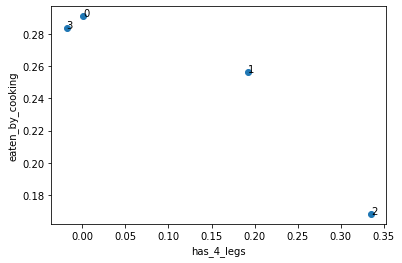

In [135]:
compare_features('onion', 'has_4_legs', 'eaten_by_cooking', model, word_data=onions)

In [6]:
model.predict_top_n_features('breakfast', 20)

['used_for_sleeping_in',
 'a_food',
 'a_fruit',
 'is_juicy',
 'a_vegetable',
 'furniture',
 'an_appliance',
 'is_yellow',
 'has_seeds',
 'used_for_eating',
 'tastes_sweet',
 'used_for_communication',
 'is_crunchy',
 'is_soft',
 'found_in_kitchens',
 'is_electrical',
 'is_small',
 'tastes_good',
 'made_of_plastic',
 'is_edible']

0    Planes made her feel faint , and in Tokyo , wh...
1    Since ordinary breakfast-table conversation wa...
2                    I enjoyed a breakfast of tamales.
3    He and Irvin Moll were sipping coffee at the b...
Name: context, dtype: object


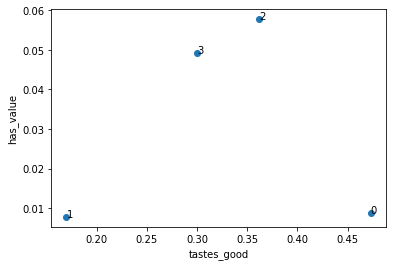

In [16]:
breakfast = np.array([
     ['breakfast', 'Planes made her feel faint , and in Tokyo , where she had gone that summer , she had been given raw fish for breakfast and so she had come straight home.']
    ,['breakfast', 'Since ordinary breakfast-table conversation was impossible , it was at least something that they were able to offer Eugene the sugar bowl with their sugar in it , and the plate of bread and butter , and that Eugene could return the pitcher of hot milk to them handle first.']
    ,['breakfast', 'I enjoyed a breakfast of tamales.']
    ,['breakfast', 'He and Irvin Moll were sipping coffee at the breakfast bar ']
])

breakfast = pd.DataFrame(breakfast, columns = ['word_form', 'context'])
breakfast
compare_features('breakfast', 'tastes_good', 'has_value', model, word_data=breakfast)